# [ANONYMISED]

**Name**: Konrad Rzucidlo

**PI**: [ANONYMISED]

### The task

In this question, I will investigate two datasets, one which details the recorded incidence of leprosy in the different countries of the world, and one which details various facts about different countries' economies. The aim is to explore the relationship between the incidence of leprosy in a country, and that country's GDP.

Data on incidence of leprosy from the World Health Organisation via the URL:

http://apps.who.int/gho/data/node.main.A1639?lang=en

The economic data from the United Nations via the URL:

http://data.un.org/_Docs/SYB/CSV/SYB62_T13_201904_GDP%20and%20GDP%20Per%20Capita.csv

** Produce two graphical representations of the data for the year 2017.**

1. **The first graph should illustrate the relationship between the number of leprosy cases and a country's GDP for all countries in the year 2017.**

2. **The second graph should show which countries had the highest number of leprosy cases per GDP in the year 2017.**

The licensing terms for the World Health Organisation data: https://www.who.int/about/copyright/en/

#### 1. Identifing and explaining the relevant licensing terms and conditions

<p><u>World Health Organisation database licencing info</u>: <a href="https://www.who.int/about/copyright/en/" target="_blank">https://www.who.int/about/copyright/en/</a><br />
<u>Specific clauses in the licence that permits my use of the database</u>:<br />
<em>&quot;<span>Extracts of the information in the web site may be reviewed, reproduced or translated for research or private study but not for sale or for use in conjunction with commercial purposes.&quot; </span></em><span>and <em>&quot;</em></span><em><span>Extracts of the information in the web site may be reviewed, reproduced or translated for research or private study but not for sale or for use in conjunction with commercial purposes.</span><span> </span></em> <em><span>Reproduction or translation of substantial portions of the web site, or any use other than for educational or other non-commercial purposes, require explicit, prior authorization in writing</span><span>&quot;. </span></em>I did so by adding &quot;References&quot; section at the end of this document. Using the data for the Tutor Marked Assessment fulfils the &quot;<em><span>educational or other non-commercial purposes</span></em>&quot; requirement.</p>

<p>&nbsp;</p>

<p><u>United Nations database licencing info</u>: <a href="http://data.un.org/Host.aspx?Content=UNdataUse" target="_blank">http://data.un.org/Host.aspx?Content=UNdataUse</a><br />
<u>Specific clauses in the licence that permits my use of the database</u>:<br />
<em>&quot; All data and metadata provided on <span style="color: #41599a ; font-size: 1em">UN</span><span style="color: #f60 ; font-size: 1em">data</span>&rsquo;s website are available free of charge and may be copied freely, duplicated and further distributed provided that <span style="color: #41599a ; font-size: 1em">UN</span><span style="color: #f60 ; font-size: 1em">data</span> is cited as the reference. &quot;. </em>Therefore I needed to make sure I referenced my use of the database. I did so by adding &quot;References&quot; section at the end of this document.</p>


#### 2. Importing the two datasets

In [1]:
#imports
import requests
import pandas as pd
import chardet
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

#disables SettingWithCopyWarning false positive warning. 
pd.options.mode.chained_assignment = None  # default='warn'
#please run cells from top to bottom, as doing it in any different way, or more than once might produce uninteneded results.

In [2]:
# setting urls as variables
GDP_DATABASE_URL = 'http://data.un.org/_Docs/SYB/CSV/SYB62_T13_201904_GDP%20and%20GDP%20Per%20Capita.csv'
LEPROSY_DATABASE_URL = 'https://apps.who.int/gho/athena/data/GHO/WHS3_45?filter=COUNTRY:*&x-sideaxis=COUNTRY&x-topaxis=GHO;YEAR&profile=crosstable&format=csv'

# downloadaing the data and assigning to variables
GDP_database_raw_data = requests.get(GDP_DATABASE_URL)
leprosy_database_raw_data = requests.get(LEPROSY_DATABASE_URL)

In [3]:
'''
at this point I decided to save the data, so that later on, in case any website goes down
and I restart the kernel, losing the variables in the process, I'd still have the data saved as a file. 
I'm using the ";" sign at the end to suppress the output.
'''
# writing data to CSV files
open('data/GDP_database.csv', 'wb').write(GDP_database_raw_data.content)
open('data/leprosy_database.csv', 'wb').write(leprosy_database_raw_data.content)

20941

In [4]:
# assigning CVS to pandas data frame
GDP_database_df = pd.read_csv('data/GDP_database.csv',
                              encoding=chardet.detect((GDP_database_raw_data.content))[
                                  'encoding'],
                              index_col=False, header=1)

leprosy_database_df = pd.read_csv('data/leprosy_database.csv',
                                  encoding=chardet.detect((leprosy_database_raw_data.content))[
                                      'encoding'],
                                  index_col=False, header=1)

#### 3. Identifing and handling ambiguity and vagueness

In [5]:
#keeping only the rows where year is equal to 2017, and selecting only one type of GDP information
GDP_database_df = GDP_database_df[(GDP_database_df['Year'] == 2017) & \
                                  (GDP_database_df['Series'] == 'GDP in current prices (millions of US dollars)')] \
                    [['Unnamed: 1','Value']] #keeping only two important columns

#renaming the columns
GDP_database_df.columns = ['Country', 'GDP in 2017 (millions of US Dollars)']

In [6]:
# replacing the ',' with blank, to make conversions of string type to integer type later on
GDP_database_df['GDP in 2017 (millions of US Dollars)'] = \
    GDP_database_df['GDP in 2017 (millions of US Dollars)'].str.replace(
        ',', '')

# drops rows where value for column ' 2017' was 'No data'
leprosy_database_df = leprosy_database_df[leprosy_database_df[' 2017'] != 'No data'][[
    'Country', ' 2017']]  # only keeps those two columns

array([      44,       60,      114,      197,      199,      281,
            292,      309,      336,      393,      427,      497,
            780,      856,      864,      931,      996,     1017,
           1082,     1127,     1139,     1212,     1347,     1391,
           1487,     1489,     1510,     1535,     1690,     1718,
           1773,     1845,     1902,     1993,     2562,     2632,
           2701,     2763,     2790,     2955,     3013,     3155,
           3543,     3740,     3807,     4030,     4409,     4713,
           4786,     4845,     4866,     4874,     4992,     5606,
           5694,     5813,     6269,     6296,     6339,     6401,
           7146,     7228,     7241,     7565,     8120,     8128,
           8521,     9136,     9236,     9894,    10208,    10717,
          11135,    11280,    11292,    11537,    11792,    12128,
          12325,    12487,    12553,    12652,    13039,    13208,
          13245,    13366,    13814,    14498,    14623,    14

In [ ]:
# changing the type of the column from string to integer
GDP_database_df = GDP_database_df.astype(
    {'GDP in 2017 (millions of US Dollars)': 'int32'})
leprosy_database_df = leprosy_database_df.astype({' 2017': 'int32'})

# displaying unique values for the column in order to identify outliers/dirty data. In this case none found.
GDP_database_df['GDP in 2017 (millions of US Dollars)'].sort_values(
    ascending=True).unique()

In [7]:
#deleting first 30 rows of data, as they refer to regions, rather than countries.
GDP_database_df = GDP_database_df.iloc[30:,] 

In [8]:
'''
lists unique values for year 2017, which allows to identify how missing data was described.
In this case 'No data' value used
'''
leprosy_database_df[' 2017'].unique() 

array([    45,      0,    605,    250,     10,      2,   3754,      1,
          150,     12,     62,  26875,    192,    400,      9,    137,
          249,      5,    341,    373,    634,    362,    429,    204,
           11,    773,    190,   3649,    123,     44,    543,      4,
            3,   3114,      8,      6,    258,    239,     32,     67,
           36, 126164,  15910,     19,     26,    187,     90,    152,
         1430,    351,    196,    174,     28,    148,    141,     13,
         1926,   2279,   3215,      7,    278,   2447,    403,    583,
          321,   1902,     21,    235,    113,     41,   1576,     86,
         1877,    551,    164,    106,     16,    211,   1936,    191,
          332,    109,    357,     18])

In [9]:
#renames the column names
leprosy_database_df.columns = ['Country', 'Number of leprosy cases in 2017']

In [10]:
#checks for duplicate countries in the leprosy database
leprosy_database_df_duplicate_country_check = leprosy_database_df['Country'].duplicated()

leprosy_database_df_duplicate_country_check = \
    leprosy_database_df_duplicate_country_check[leprosy_database_df_duplicate_country_check == True].index.tolist()

#if the list is not empty, then error is printed to the screen.
if leprosy_database_df_duplicate_country_check: 
    print ("Error: There are duplicates in the Country column. Investigate it further")

In [11]:
#checks for duplicate countries in the GDP database
GDP_database_df_duplicate_country_check = GDP_database_df['Country'].duplicated()

GDP_database_df_duplicate_country_check = \
    GDP_database_df_duplicate_country_check[GDP_database_df_duplicate_country_check == True].index.tolist()

#if the list is not empty, then error is printed to the screen.
if GDP_database_df_duplicate_country_check:
    print ("Error: There are duplicates in the Country column. Investigate it further")

#### 4. Identifing and handling missing data

Below cell:
merges two databases on common values in 'Country', if no corresponding value for that country in 'Number of leprosy cases in 2017' then it will be listed in leprosy_database_df_and_GDP_database_df_missmatched_data

Below output contains 'Country' values from the leprosy_database_df with no match in the GDP_database_df

In [12]:
leprosy_database_df_and_GDP_database_df_missmatched_data_df = leprosy_database_df.merge(GDP_database_df,
         on=['Country'],
         how='left',
         indicator=True).query('_merge == "left_only"').drop({'_merge', 'Number of leprosy cases in 2017', 
                                                              'GDP in 2017 (millions of US Dollars)'}, 1)

leprosy_database_df_and_GDP_database_df_missmatched_data_df

,Country
15,Bolivia (Plurinational State of)
34,CÃ´te d'Ivoire
38,Democratic Republic of the Congo
71,Lao People's Democratic Republic
85,Micronesia (Federated States of)
98,Niue
112,Saint Vincent and the Grenadines
137,United Kingdom of Great Britain and Northern I...
138,United Republic of Tanzania
142,Venezuela (Bolivarian Republic of)


OpenRefine's various fuzzy match algorithms were only able to find 6/10 occurrences from, whereas I was able to find 9/10 by using partial string match as displayed in the cell below. 
Because of that, I decided against using either OpenRefine or libraries for fuzzy match in python

The output of the cell above guided me when constructing custom_partial_search python list.

In [13]:
custom_partial_search = ['Bolivia', 'voire', 'of the Congo', 'Lao', 'Micronesia', 'Niue', 'Vincent', 'United Kingdom', 'Tanzania', 'Venezuela']
discrepancies_dictionary = {}
counter = 0

for i in custom_partial_search: 
    custom_partial_search = GDP_database_df[GDP_database_df['Country'].str.contains(i)]
        
    try:
        discrepancies_dictionary[leprosy_database_df_and_GDP_database_df_missmatched_data_df['Country'].
             iloc[counter]] = custom_partial_search['Country'].iloc[0] #returns first row of 'Country' df
    except:
        pass #IndexError would happen for the value it couldn't find, as there will be nothing at ...iloc[0]
    counter += 1


discrepancies_dictionary 

{'Bolivia (Plurinational State of)': 'Bolivia (Plurin. State of)',
 "CÃ´te d'Ivoire": 'Côte d’Ivoire',
 'Democratic Republic of the Congo': 'Dem. Rep. of the Congo',
 "Lao People's Democratic Republic": "Lao People's Dem. Rep.",
 'Micronesia (Federated States of)': 'Micronesia (Fed. States of)',
 'Saint Vincent and the Grenadines': 'Saint Vincent & Grenadines',
 'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
 'United Republic of Tanzania': 'United Rep. of Tanzania',
 'Venezuela (Bolivarian Republic of)': 'Venezuela (Boliv. Rep. of)'}

In [14]:
#replaces the Country values, in order to match the values from the GDP_database_df

discrepancies_dictionary 
leprosy_database_df['Country'] = leprosy_database_df['Country'].replace(discrepancies_dictionary)

leprosy_database_df.head()

,Country,Number of leprosy cases in 2017
0,Afghanistan,45
3,Andorra,0
4,Angola,605
5,Antigua and Barbuda,0
6,Argentina,250


In [15]:
#as in one of the cells above, the code in this cell is the same. The code lists Country for which there is still 
#no GDP data, that country will be dropped later on, when performing a merge.

leprosy_database_df_and_GDP_database_df_missmatched_data_df = leprosy_database_df.merge(GDP_database_df,
         on=['Country'],
         how='left',
         indicator=True).query('_merge == "left_only"').drop({'_merge', 'Number of leprosy cases in 2017', 
                                                              'GDP in 2017 (millions of US Dollars)'}, 1)

leprosy_database_df_and_GDP_database_df_missmatched_data_df

,Country
98,Niue


#### 5. Identifing and handle inconsistent or dirty data

<p>At the level of the cell <u>&quot;In [8]&quot; </u>in this notebook, I found Congo and Micronesia to appear duplicated.</p>

<p>For Congo, I used Wikipedia to confirm that there are indeed separate countries with &quot;Congo&quot; in its name.</p>

<p>&quot;Democratic Republic of the Congo&quot; and &quot;Republic of the Congo&quot;. I decided against renaming it and checked if GDP figures were approximately matching those from Wikipedia, that to make sure they were not mistyped.</p>

<p>&quot;Congo&quot; from the database matches &quot;Republic of the Congo&quot;, and &quot;Dem. Rep. of the Congo&quot; from the database matches &quot;Democratic Republic of the Congo&quot;; which makes sense, as many countries have longer names, e.g. Austria being officially &quot;the Republic of Austria&quot;, but that&#39;s not how they were named in the WHO database.</p>

<p>For Micronesia - I used Wikipedia to learn that this name can refer to both Federated States of Micronesia or region. The region row was dropped in the cell <u>&quot;In [9]&quot;</u> together with other regions.</p>


#### 6. Putting the data into an appropriate form for plotting

In [16]:
#merges the df

plotting_data_df = leprosy_database_df.merge(GDP_database_df,
         on=['Country'],
         how='left',
         indicator=True).query('_merge == "both"').drop({'_merge'}, 1)

plotting_data_df.head()

,Country,Number of leprosy cases in 2017,GDP in 2017 (millions of US Dollars)
0,Afghanistan,45,21993.0
1,Andorra,0,3013.0
2,Angola,605,126506.0
3,Antigua and Barbuda,0,1510.0
4,Argentina,250,637486.0


#### 7. Visualising the data

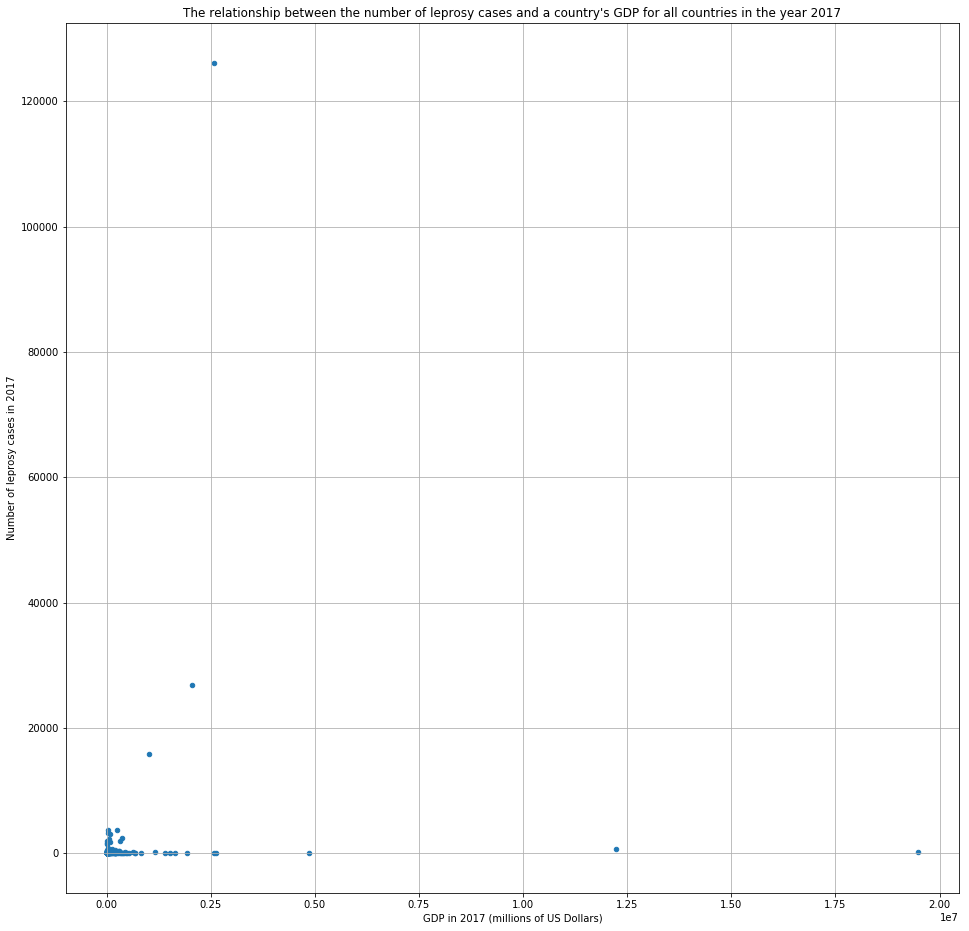

In [17]:
 plotting_data_df.plot.scatter(x='GDP in 2017 (millions of US Dollars)', 
                              y='Number of leprosy cases in 2017',
                              title="The relationship between the number of leprosy cases and a country\'s GDP for all countries in the year 2017",
                              logx=False, 
                              figsize=(16,16),
                              grid=True)

In [18]:
#assigns 10 most affected countries to a variable
leprosy_ten_most_affected_countries_df = plotting_data_df.sort_values('Number of leprosy cases in 2017').tail(10)
grouped = leprosy_ten_most_affected_countries_df.groupby('Country')

In [19]:
#sets variables necessary for below plot
legendpatch_list = []
colours = {'Indonesia':'red',
           'Brazil':'green',
           'India':'blue',
           'Bangladesh':'black',
           'Dem. Rep. of the Congo':'yellow',
           'Nepal':'magenta',
           'Ethiopia':'cyan',
           'Nigeria':'pink',
           'Myanmar':'orange',
           'United Rep. of Tanzania':'violet'}

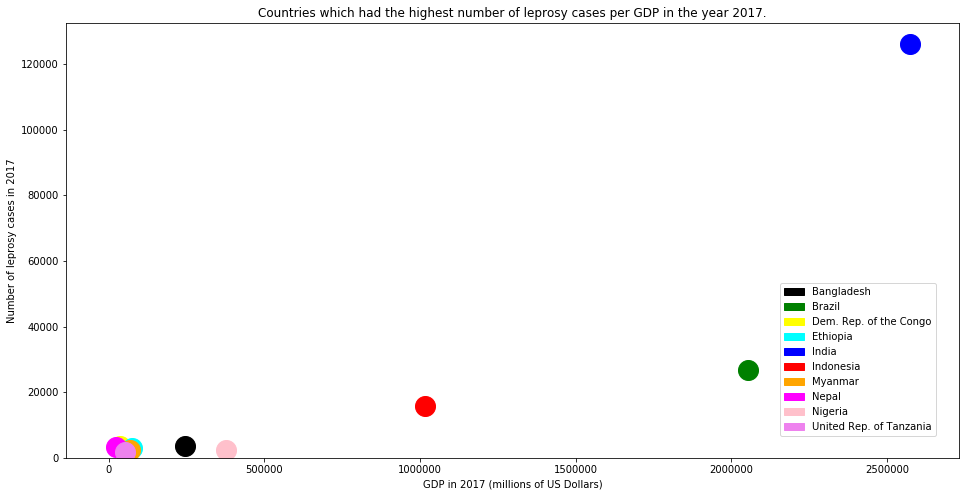

In [20]:
fig, ax = plt.subplots()

for key, group in grouped:
    legendpatch_list = legendpatch_list+([mpatches.Patch(color=colours[key], label=key)]) 
    group.plot.scatter(ax=ax,
                       x='GDP in 2017 (millions of US Dollars)', 
                       y='Number of leprosy cases in 2017', 
                       title="Countries which had the highest number of leprosy cases per GDP in the year 2017.",
                       s=400, #setting the points to be bigger, therefore making the colours more readable
                       c=colours[key],
                       ylim=[leprosy_ten_most_affected_countries_df['Number of leprosy cases in 2017'] \
                             .min()*0.01, plotting_data_df['Number of leprosy cases in 2017'].max()*1.05],
                       figsize=(16,8))

plt.legend(handles=legendpatch_list, loc=(0.8,0.05)) #the location of the legend in not above location on any data points.

#### 8. Interpret your plot

From the graph I cannot see neither a strong positive nor negavtive correlation between country's GDP and leprosy cases. I decided to use python to check as well:

In [21]:
#for ten most affected countries
leprosy_ten_most_affected_countries_df['Number of leprosy cases in 2017']. \
corr(leprosy_ten_most_affected_countries_df['GDP in 2017 (millions of US Dollars)'])

0.8499890363832343

In [22]:
#and for all the cointries
plotting_data_df['Number of leprosy cases in 2017']. \
corr(plotting_data_df['GDP in 2017 (millions of US Dollars)'])

0.10221655921766384

Perhaps other indicator, be it GDP per capita, would be more correlated to number of leprosy cases and/or leprosy cases per x number of population.

Both plots seem to have outlier values when it comes to leprosy cases, but that could be explained by number of population, outbreaks etc., but not by the Gross Domestic Product alone.

#### 9. References

Data.un.org. (2019). [online] Available at: http://data.un.org/_Docs/SYB/CSV/SYB62_T13_201904_GDP%20and%20GDP%20Per%20Capita.csv [Accessed 1 Dec. 2019].

Apps.who.int. (2019). [online] Available at: https://apps.who.int/gho/athena/data/GHO/WHS3_45?filter=COUNTRY:*&x-sideaxis=COUNTRY&x-topaxis=GHO;YEAR&profile=crosstable&format=csv [Accessed 1 Dec. 2019].